### A notebook for data analysis of the sensitivity analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Specify the experiment wanted
value_to_vary_name = "earthquake-magnitude"
v = 0.32
replications = 25

# Read the pickle
series_df = pd.read_pickle(f'../results/sensitivity/sens_series_{value_to_vary_name}_{v}_{replications}r_df.pickle')
series_df.head()

,recovered-hospital,recovered-with-help,recovered-unchecked,fraction-called-in,deaths,number-destroyed-streets-spotted,fraction-destroyed-streets-spotted,recovered-hospital,recovered-with-help,recovered-unchecked,...,deaths,number-destroyed-streets-spotted,fraction-destroyed-streets-spotted,recovered-hospital,recovered-with-help,recovered-unchecked,fraction-called-in,deaths,number-destroyed-streets-spotted,fraction-destroyed-streets-spotted
,0,0,0,0,0,0,0,1,1,1,...,23,23,23,24,24,24,24,24,24,24
0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,...,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0
1.0,0.0,6.0,136.0,0.034633,77.0,84.0,0.034077,0.0,6.0,120.0,...,64.0,66.0,0.028133,0.0,5.0,106.0,0.034956,84.0,78.0,0.032691
2.0,0.0,17.0,284.0,0.044219,83.0,150.0,0.060852,0.0,11.0,283.0,...,73.0,103.0,0.043905,0.0,9.0,230.0,0.041686,88.0,108.0,0.045264
3.0,0.0,25.0,416.0,0.053767,87.0,205.0,0.083164,0.0,17.0,424.0,...,80.0,142.0,0.060529,0.0,12.0,361.0,0.052177,95.0,147.0,0.061609
4.0,0.0,31.0,563.0,0.063817,92.0,245.0,0.099391,0.0,26.0,561.0,...,84.0,193.0,0.082268,0.0,16.0,506.0,0.061797,97.0,188.0,0.078793


<AxesSubplot: >

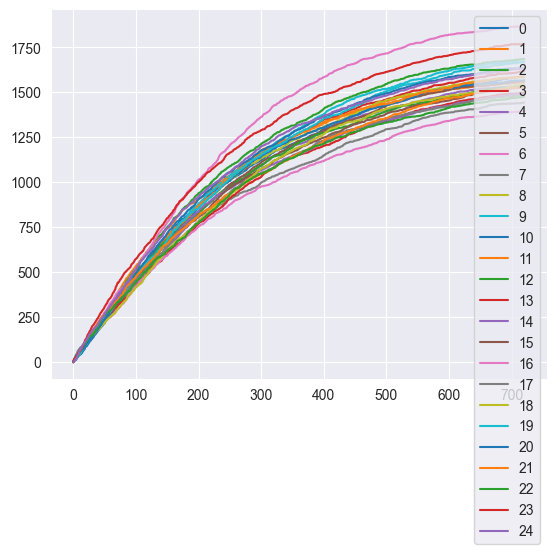

In [3]:
# Plot for one run all the variables
series_df["recovered-with-help"].plot()

<AxesSubplot: >

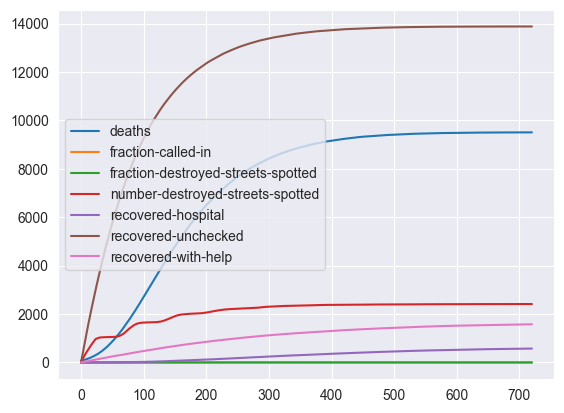

In [4]:
# Take the average of all the runs and plot those
series_df_agg = series_df.groupby(level=[0], axis="columns").mean()
series_df_agg.plot()

## Full sensitivity analysis

### Load data

In [5]:
# Load a dictionary with the default values and if they are rounded or not
default_values = {
    # variable-name: (number, rounded to int or not)
    "call-limit": (True, False),
    "earthquake-magnitude": (0.4, False),
    "amount-ambulances": (40, True),
    "probability-call-112": (1, False),
    "amount-hospitals": (10, True),
    "hospital-capacity": (100, True),
    "hospital-filling-percentage-t0": (60, False),
    "initial-ambulance-search-radius": (5, True),
    "percentage-concrete-buildings": (70, False),
    "high-damage-road-blocked-chance": (10, False),
    "collapsed-road-blocked-chance": (25, False),
    "max-concurrent-calls": (50, True),
    "average-call-time": (2.5, False),
    "amount-drones": (10, True),
    "drone-speed": (0.5, False),
    "drone-range": (45, False),
    "ambulance-reroute-frequency": (5, True),
    # "drone-view-radius": (250, True),
}

In [6]:
# Create a dictionary with all the input values used
input_values = {}
amount_to_vary = [0.8, 1.25]

for var, val in default_values.items():
    input_values[var] = [round(val[0] * v, 5) for v in amount_to_vary]
    if val[1]:
        input_values[var] = [int(v) for v in input_values[var]]
input_values["call-limit"] = [True, False]
input_values

{'call-limit': [True, False],
 'earthquake-magnitude': [0.32, 0.5],
 'amount-ambulances': [32, 50],
 'probability-call-112': [0.8, 1.25],
 'amount-hospitals': [8, 12],
 'hospital-capacity': [80, 125],
 'hospital-filling-percentage-t0': [48.0, 75.0],
 'initial-ambulance-search-radius': [4, 6],
 'percentage-concrete-buildings': [56.0, 87.5],
 'high-damage-road-blocked-chance': [8.0, 12.5],
 'collapsed-road-blocked-chance': [20.0, 31.25],
 'max-concurrent-calls': [40, 62],
 'average-call-time': [2.0, 3.125],
 'amount-drones': [8, 12],
 'drone-speed': [0.4, 0.625],
 'drone-range': [36.0, 56.25],
 'ambulance-reroute-frequency': [4, 6]}

In [7]:
reference = f'../results/sensitivity/sens_series_call-limit_True_{replications}r_df.pickle'

In [8]:
# Read all the pickles into a dictionary of dataframes
dfs = {}
for k, vs in input_values.items():
    for i, v in enumerate(vs):
        dfs[(k, v)] = pd.read_pickle(f'../results/sensitivity/sens_series_{k}_{v}_{replications}r_df.pickle')
        if i == 0:  # Add the reference df after each first value
            dfs[(k, default_values[k][0])] = pd.read_pickle(reference)

In [9]:
KPIs = list(set(dfs[('call-limit', True)].droplevel(1, axis="columns").columns))
print(KPIs)

['recovered-hospital', 'fraction-called-in', 'number-destroyed-streets-spotted', 'fraction-destroyed-streets-spotted', 'recovered-with-help', 'deaths', 'recovered-unchecked']


### Calculate means

In [10]:
# Create a dictionary with the means
mean_dict = {}
for (k, v), df_t in dfs.items():
    mean_dict[(k, v)] = df_t.iloc[720]

In [11]:
mean_df = pd.DataFrame.from_dict(mean_dict).T
mean_df = mean_df.sort_index(axis="columns", level=0)
mean_df

deaths                             \
                                            0        1        2        3    
call-limit                      True   10391.0   9324.0   9908.0   9874.0   
                                False  10071.0   9995.0   9827.0   9557.0   
earthquake-magnitude            0.32    9968.0   9422.0   9603.0   9516.0   
                                0.4    10391.0   9324.0   9908.0   9874.0   
                                0.5     9321.0  10262.0  10682.0  10662.0   
amount-ambulances               32      9799.0  10163.0  10241.0  10249.0   
                                40     10391.0   9324.0   9908.0   9874.0   
                                50     10038.0  10212.0   9844.0  10079.0   
probability-call-112            0.8     9593.0  10094.0   9743.0   9479.0   
                                True   10391.0   9324.0   9908.0   9874.0   
                                1.25   10127.0  10061.0  10139.0   9657.0   
amount-hospitals                8      10026.0   9835.0   9961.0  10289.0   
                                10     10391.0   9324.0   9908.0   9874.0   
                                12      9883.0  10214.0   9626.0  10107.0   
hospital-capacity               80      9456.0   9978.0   9990.0   9956.0   
                                100    10391.0   9324.0   9908.0   9874.0   
                                125     9859.0   9862.0   9954.0   9668.0   
hospital-filling-percentage-t0  48.0    9910.0   9803.0   9879.0  10369.0   
                                60     10391.0   9324.0   9908.0   9874.0   
                                75.0    9697.0  10155.0   9947.0  10218.0   
initial-ambulance-search-radius 4       9350.0   9876.0   9617.0   9833.0   
                                5      10391.0   9324.0   9908.0   9874.0   
                                6      10004.0   9989.0   9847.0   9543.0   
percentage-concrete-buildings   56.0    9922.0   9781.0  10347.0  10061.0   
                                70     10391.0   9324.0   9908.0   9874.0   
                                87.5   10411.0   9456.0   9688.0   9576.0   
high-damage-road-blocked-chance 8      10322.0   9517.0   9993.0  10226.0   
                                10     10391.0   9324.0   9908.0   9874.0   
                                12.5    9919.0   9590.0   9856.0  10341.0   
collapsed-road-blocked-chance   20.0    9517.0  10125.0   9820.0   9630.0   
                                25     10391.0   9324.0   9908.0   9874.0   
                                31.25  10443.0   9562.0  10045.0   9693.0   
max-concurrent-calls            40      9809.0  10332.0   9571.0   9880.0   
                                50     10391.0   9324.0   9908.0   9874.0   
                                62     10037.0  10487.0   9839.0   9932.0   
average-call-time               2.0     9884.0   9681.0   9821.0  10302.0   
                                2.5    10391.0   9324.0   9908.0   9874.0   
                                3.125   9865.0  10149.0  10016.0  10045.0   
amount-drones                   8       9793.0   9461.0   9981.0   9967.0   
                                10     10391.0   9324.0   9908.0   9874.0   
                                12     10132.0   9732.0  10363.0  10106.0   
drone-speed                     0.4    10178.0   9632.0   9962.0  10019.0   
                                0.5    10391.0   9324.0   9908.0   9874.0   
                                0.625   9987.0   9638.0  10092.0   9886.0   
drone-range                     36.0    9937.0  10086.0  10279.0  10053.0   
                                45     10391.0   9324.0   9908.0   9874.0   
                                56.25   9905.0  10114.0   9754.0  10153.0   
ambulance-reroute-frequency     4      10127.0   9987.0  10047.0   9943.0   
                                5      10391.0   9324.0   9908.0   9874.0   
                                6      10359.0   9796.0   9739.0   9964.0   

                                   

In [12]:
mean_df.to_excel("test.xlsx")

### Normalize sensitivity

In [13]:
mean_df_s = mean_df.T.drop(columns="call-limit", level=0)
mean_df_s

earthquake-magnitude                    \
                                       0.32      0.4      0.5   
deaths              0                9968.0  10391.0   9321.0   
                    1                9422.0   9324.0  10262.0   
                    2                9603.0   9908.0  10682.0   
                    3                9516.0   9874.0  10662.0   
                    4                9350.0   9575.0  10201.0   
...                                     ...      ...      ...   
recovered-with-help 20               1635.0   1601.0   1607.0   
                    21               1529.0   1571.0   1548.0   
                    22               1474.0   1567.0   1207.0   
                    23               1769.0   1446.0   1759.0   
                    24               1632.0   1652.0   1727.0   

                       amount-ambulances                    \
                                      32       40       50   
deaths              0             9799.0  10391.0  10038.0   
                    1            10163.0   9324.0  10212.0   
                    2            10241.0   9908.0   9844.0   
                    3            10249.0   9874.0  10079.0   
                    4             9975.0   9575.0   9489.0   
...                                  ...      ...      ...   
recovered-with-help 20            1658.0   1601.0   1606.0   
                    21            1401.0   1571.0   1593.0   
                    22            1473.0   1567.0   1693.0   
                    23            1587.0   1446.0   1858.0   
                    24            1422.0   1652.0   1554.0   

                       probability-call-112                    \
                                        0.8     True     1.25   
deaths              0                9593.0  10391.0  10127.0   
                    1               10094.0   9324.0  10061.0   
                    2                9743.0   9908.0  10139.0   
                    3                9479.0   9874.0   9657.0   
                    4                9556.0   9575.0  10279.0   
...                                     ...      ...      ...   
recovered-with-help 20               1453.0   1601.0   1721.0   
                    21               1417.0   1571.0   1536.0   
                    22               1586.0   1567.0   1647.0   
                    23               1727.0   1446.0   1278.0   
                    24               1505.0   1652.0   1444.0   

                       amount-hospitals  ... amount-drones drone-speed  \
                                      8  ...            12         0.4   
deaths              0           10026.0  ...       10132.0     10178.0   
                    1            9835.0  ...        9732.0      9632.0   
                    2            9961.0  ...       10363.0      9962.0   
                    3           10289.0  ...       10106.0     10019.0   
                    4            9563.0  ...        9925.0     10359.0   
...                                 ...  ...           ...         ...   
recovered-with-help 20           1479.0  ...        1549.0      1418.0   
                    21           1295.0  ...        1669.0      1672.0   
                    22           1180.0  ...        1529.0      1418.0   
                    23           1416.0  ...        1606.0      1688.0   
                    24           1377.0  ...        1283.0      1548.0   

                                         drone-range                    \
                            0.5    0.625        36.0       45    56.25   
deaths              0   10391.0   9987.0      9937.0  10391.0   9905.0   
                    1    9324.0   9638.0     10086.0   9324.0  10114.0   
                    2    9908.0  10092.0     10279.0   9908.0   9754.0   
                    3    9874.0   9886.0     10053.0   9874.0  10153.0   
                    4    9575.0   9378.0      9745.0   9575.0   9858.0   
...                         ...      ...   

In [14]:
dev_df = pd.DataFrame(index=mean_df_s.index)
for key in list(input_values.keys())[1::]:
    ref = mean_df_s[key].columns[1]
    for i, column in enumerate(mean_df_s[key].columns):
        if i != 1:
            ratio = column/ref
            dev_df[key, ratio] = (mean_df_s[key][column] - mean_df_s[key][ref]) / mean_df_s[key][ref]
dev_df.columns = pd.MultiIndex.from_tuples(dev_df.columns)
dev_df.T

deaths                                \
                                            0         1         2         3    
earthquake-magnitude            0.80 -0.040708  0.010511 -0.030783 -0.036257   
                                1.25 -0.102974  0.100601  0.078119  0.079806   
amount-ambulances               0.80 -0.056972  0.089983  0.033609  0.037979   
                                1.25 -0.033972  0.095238 -0.006459  0.020762   
probability-call-112            0.80 -0.076797  0.082583 -0.016653 -0.040004   
                                1.25 -0.025407  0.079043  0.023314 -0.021977   
amount-hospitals                0.80 -0.035127  0.054805  0.005349   0.04203   
                                1.20 -0.048888  0.095453 -0.028462  0.023597   
hospital-capacity               0.80 -0.089982  0.070142  0.008276  0.008305   
                                1.25 -0.051198  0.057701  0.004643 -0.020863   
hospital-filling-percentage-t0  0.80  -0.04629  0.051373 -0.002927  0.050132   
                                1.25 -0.066789  0.089125  0.003936  0.034839   
initial-ambulance-search-radius 0.80 -0.100183  0.059202  -0.02937 -0.004152   
                                1.20 -0.037244  0.071321 -0.006157 -0.033522   
percentage-concrete-buildings   0.80 -0.045135  0.049013  0.044308  0.018939   
                                1.25  0.001925  0.014157 -0.022204  -0.03018   
high-damage-road-blocked-chance 0.80  -0.00664  0.020699  0.008579  0.035649   
                                1.25 -0.045424  0.028529 -0.005248  0.047296   
collapsed-road-blocked-chance   0.80 -0.084111  0.085907 -0.008882 -0.024711   
                                1.25  0.005004  0.025526  0.013827 -0.018331   
max-concurrent-calls            0.80  -0.05601  0.108108 -0.034013  0.000608   
                                1.24 -0.034068  0.124732 -0.006964  0.005874   
average-call-time               0.80 -0.048792  0.038288 -0.008781  0.043346   
                                1.25 -0.050621  0.088481    0.0109  0.017318   
amount-drones                   0.80  -0.05755  0.014693  0.007368  0.009419   
                                1.20 -0.024925  0.043758  0.045922  0.023496   
drone-speed                     0.80 -0.020499  0.033033   0.00545  0.014685   
                                1.25  -0.03888  0.033677  0.018571  0.001215   
drone-range                     0.80 -0.043692  0.081725  0.037444  0.018128   
                                1.25 -0.046771  0.084728 -0.015543  0.028256   
ambulance-reroute-frequency     0.80 -0.025407  0.071107  0.014029  0.006988   
                                1.20  -0.00308  0.050622 -0.017057  0.009115   

                                                                              \
                                            4         5         6         7    
earthquake-magnitude            0.80 -0.023499 -0.028285 -0.053795 -0.052834   
                                1.25  0.065379  0.009829  0.132247  0.089908   
amount-ambulances               0.80  0.041775  0.001003  0.030871  0.006566   
                                1.25 -0.008982 -0.004514  0.029037 -0.041418   
probability-call-112            0.80 -0.001984  0.014343 -0.018339 -0.005051   
                                1.25  0.073525 -0.001705 -0.003464 -0.033539   
amount-hospitals                0.80 -0.001253 -0.027783  0.012939  0.049601   
                                1.20  0.049608   0.00682  0.021396   0.00596   
hospital-capacity               0.80  0.074569  0.011836   0.00866 -0.000101   
                                1.25  0.044386 -0.033701  -0.02812  0.017578   
hospital-filling-percentage-t0  0.80  0.071958 -0.009829 -0.000611  -0.01091   
                                1.25 -0.025796 -0.010632 -0.026694  0.036367   
initial-ambulance-search-radius 0.80  -0.00094 -0.027683   0.00326  0.018083   
                                1.20  0.046371 -0.028485  0.018034 -0.007779   
percentage-concrete-buildings   0.80  0

### Extreme values

In [15]:
ev_inputs = [
    "earthquake-magnitude",
    "amount-ambulances",
    "amount-hospitals",
    # "drone-view-radius",
]

In [16]:
# Create a dictionary with all the input values used
ev_input_values = {}
amount_to_vary = [0.2, 1.8]

for var, val in default_values.items():
    if var in ev_inputs:
        ev_input_values[var] = [round(val[0] * v, 5) for v in amount_to_vary]
        if val[1]:
            ev_input_values[var] = [int(v) for v in ev_input_values[var]]
ev_input_values

{'earthquake-magnitude': [0.08, 0.72],
 'amount-ambulances': [8, 72],
 'amount-hospitals': [2, 18]}

In [17]:
# Read all the pickles into a dictionary of dataframes
ev_dfs = {}
for k, vs in ev_input_values.items():
    for i, v in enumerate(vs):
        ev_dfs[(k, v)] = pd.read_pickle(f'../results/sensitivity/sens_series_{k}_{v}_{10}r_df.pickle')

In [18]:
# Create a dictionary with the means
ev_mean_dict = {}
for (k, v), df_t in ev_dfs.items():
    ev_mean_dict[(k, v)] = df_t.iloc[720].to_dict()

ev_mean_df = pd.DataFrame.from_dict(ev_mean_dict).T
ev_mean_df.sort_index(axis="columns", level=0)

deaths                                      \
                                  0        1        2        3        4   
earthquake-magnitude 0.08   10081.0   8205.0   8511.0   8183.0   8283.0   
                     0.72    8294.0  11223.0  11407.0  11990.0  11222.0   
amount-ambulances    8.00    9600.0  10453.0  10470.0  10397.0  10095.0   
                     72.00   9636.0   9561.0   9584.0   9958.0   9445.0   
amount-hospitals     2.00   10744.0   9582.0  10179.0  10408.0  10190.0   
                     18.00  10152.0  10180.0   9797.0   9906.0  10203.0   

                                                                         ...  \
                                  5        6        7        8        9  ...   
earthquake-magnitude 0.08    8075.0   8234.0   8307.0   8335.0   8271.0  ...   
                     0.72   11233.0  12358.0  11809.0  11903.0  10762.0  ...   
amount-ambulances    8.00   10194.0  10557.0  10479.0  10279.0  10042.0  ...   
                     72.00   9710.0   9774.0   9987.0   9783.0  10107.0  ...   
amount-hospitals     2.00   10120.0   9814.0  10222.0  10112.0   9953.0  ...   
                     18.00   9690.0   9799.0   9297.0  10384.0   9339.0  ...   

                           recovered-with-help                          \
                                             0       1       2       3   
earthquake-magnitude 0.08               1608.0  1599.0  1722.0  1435.0   
                     0.72               1589.0  1483.0  1452.0  1442.0   
amount-ambulances    8.00               1700.0   837.0   949.0   911.0   
                     72.00               965.0  1891.0  1783.0  1894.0   
amount-hospitals     2.00               1183.0   730.0   458.0   490.0   
                     18.00               614.0  2064.0  2194.0  2122.0   

                                                                            
                                 4       5       6       7       8       9  
earthquake-magnitude 0.08   1491.0  1450.0  1580.0  1611.0  1261.0  1453.0  
                     0.72   1813.0  1697.0  1732.0  1604.0  1506.0  1676.0  
amount-ambulances    8.00    894.0   877.0   926.0   928.0   973.0   973.0  
                     72.00  1819.0  1997.0  2056.0  1994.0  1957.0  1828.0  
amount-hospitals     2.00    735.0   823.0   900.0   519.0   583.0   715.0  
                     18.00  2177.0  2303.0  2126.0  2171.0  2064.0  2294.0  

[6 rows x 70 columns]

In [19]:
KPIs_to_drop = ['fraction-destroyed-streets-spotted', 'fraction-called-in', 'number-destroyed-streets-spotted']

In [20]:
ev_mean_df_s = ev_mean_df.drop(columns=KPIs_to_drop, axis=1, level=0).T
ev_mean_df_s = ev_mean_df_s.sort_index(axis="index", level=0)
ev_mean_df_s

earthquake-magnitude          amount-ambulances  \
                                     0.08     0.72              8.00    
deaths              0              10081.0   8294.0            9600.0   
                    1               8205.0  11223.0           10453.0   
                    2               8511.0  11407.0           10470.0   
                    3               8183.0  11990.0           10397.0   
                    4               8283.0  11222.0           10095.0   
                    5               8075.0  11233.0           10194.0   
                    6               8234.0  12358.0           10557.0   
                    7               8307.0  11809.0           10479.0   
                    8               8335.0  11903.0           10279.0   
                    9               8271.0  10762.0           10042.0   
recovered-hospital  0                599.0    577.0             651.0   
                    1                570.0    508.0             149.0   
                    2                652.0    484.0             158.0   
                    3                521.0    528.0             160.0   
                    4                556.0    659.0             143.0   
                    5                528.0    635.0             156.0   
                    6                637.0    652.0             202.0   
                    7                649.0    553.0             184.0   
                    8                424.0    558.0             190.0   
                    9                520.0    630.0             193.0   
recovered-unchecked 0              14228.0  12513.0           14164.0   
                    1              12547.0  15766.0           14416.0   
                    2              12651.0  15529.0           14889.0   
                    3              12639.0  15964.0           14462.0   
                    4              12982.0  15408.0           14315.0   
                    5              12332.0  15509.0           14484.0   
                    6              12783.0  16335.0           14625.0   
                    7              13071.0  15817.0           14532.0   
                    8              12682.0  16104.0           14289.0   
                    9              12563.0  15325.0           14431.0   
recovered-with-help 0               1608.0   1589.0            1700.0   
                    1               1599.0   1483.0             837.0   
                    2               1722.0   1452.0             949.0   
                    3               1435.0   1442.0             911.0   
                    4               1491.0   1813.0             894.0   
                    5               1450.0   1697.0             877.0   
                    6               1580.0   1732.0             926.0   
                    7               1611.0   1604.0             928.0   
                    8               1261.0   1506.0             973.0   
                    9               1453.0   1676.0             973.0   

                               amount-hospitals           
                         72.00            2.00     18.00  
deaths              0   9636.0          10744.0  10152.0  
                    1   9561.0           9582.0  10180.0  
                    2   9584.0          10179.0   9797.0  
                    3   9958.0          10408.0   9906.0  
                    4   9445.0          10190.0  10203.0  
                    5   9710.0          10120.0   9690.0  
                    6   9774.0           9814.0   9799.0  
                    7   9987.0          10222.0   9297.0  
                    8   9783.0          10112.0  10384.0  
                    9  10107.0           9953.0   9339.0  
recovered-hospital  0    189.0            349.0    303.0  
                    1    793.0            379.0    581.0  
                    2    717.0            227.0    661.0  
                    3    715.0            235.0    582.0  
           

In [21]:
mean_df_s2 = mean_df_s.T.drop(columns=KPIs_to_drop, axis=1, level=0).T
mean_df_s2 = mean_df_s2.sort_index(axis="index", level=0)
mean_df_s2

earthquake-magnitude                    \
                                       0.32      0.4      0.5   
deaths              0                9968.0  10391.0   9321.0   
                    1                9422.0   9324.0  10262.0   
                    2                9603.0   9908.0  10682.0   
                    3                9516.0   9874.0  10662.0   
                    4                9350.0   9575.0  10201.0   
...                                     ...      ...      ...   
recovered-with-help 20               1635.0   1601.0   1607.0   
                    21               1529.0   1571.0   1548.0   
                    22               1474.0   1567.0   1207.0   
                    23               1769.0   1446.0   1759.0   
                    24               1632.0   1652.0   1727.0   

                       amount-ambulances                    \
                                      32       40       50   
deaths              0             9799.0  10391.0  10038.0   
                    1            10163.0   9324.0  10212.0   
                    2            10241.0   9908.0   9844.0   
                    3            10249.0   9874.0  10079.0   
                    4             9975.0   9575.0   9489.0   
...                                  ...      ...      ...   
recovered-with-help 20            1658.0   1601.0   1606.0   
                    21            1401.0   1571.0   1593.0   
                    22            1473.0   1567.0   1693.0   
                    23            1587.0   1446.0   1858.0   
                    24            1422.0   1652.0   1554.0   

                       probability-call-112                    \
                                        0.8     True     1.25   
deaths              0                9593.0  10391.0  10127.0   
                    1               10094.0   9324.0  10061.0   
                    2                9743.0   9908.0  10139.0   
                    3                9479.0   9874.0   9657.0   
                    4                9556.0   9575.0  10279.0   
...                                     ...      ...      ...   
recovered-with-help 20               1453.0   1601.0   1721.0   
                    21               1417.0   1571.0   1536.0   
                    22               1586.0   1567.0   1647.0   
                    23               1727.0   1446.0   1278.0   
                    24               1505.0   1652.0   1444.0   

                       amount-hospitals  ... amount-drones drone-speed  \
                                      8  ...            12         0.4   
deaths              0           10026.0  ...       10132.0     10178.0   
                    1            9835.0  ...        9732.0      9632.0   
                    2            9961.0  ...       10363.0      9962.0   
                    3           10289.0  ...       10106.0     10019.0   
                    4            9563.0  ...        9925.0     10359.0   
...                                 ...  ...           ...         ...   
recovered-with-help 20           1479.0  ...        1549.0      1418.0   
                    21           1295.0  ...        1669.0      1672.0   
                    22           1180.0  ...        1529.0      1418.0   
                    23           1416.0  ...        1606.0      1688.0   
                    24           1377.0  ...        1283.0      1548.0   

                                         drone-range                    \
                            0.5    0.625        36.0       45    56.25   
deaths              0   10391.0   9987.0      9937.0  10391.0   9905.0   
                    1    9324.0   9638.0     10086.0   9324.0  10114.0   
                    2    9908.0  10092.0     10279.0   9908.0   9754.0   
                    3    9874.0   9886.0     10053.0   9874.0  10153.0   
                    4    9575.0   9378.0      9745.0   9575.0   9858.0   
...                         ...      ...   

In [22]:
comb_mean_df = pd.concat([ev_mean_df_s, mean_df_s2], axis=1)
comb_mean_df.sort_index(level=[1], axis="columns", inplace=True)
comb_mean_df

earthquake-magnitude         drone-speed  \
                                       0.08    0.32         0.4   
deaths              0               10081.0  9968.0     10178.0   
                    1                8205.0  9422.0      9632.0   
                    2                8511.0  9603.0      9962.0   
                    3                8183.0  9516.0     10019.0   
                    4                8283.0  9350.0     10359.0   
...                                     ...     ...         ...   
recovered-with-help 20                  NaN  1635.0      1418.0   
                    21                  NaN  1529.0      1672.0   
                    22                  NaN  1474.0      1418.0   
                    23                  NaN  1769.0      1688.0   
                    24                  NaN  1632.0      1548.0   

                       earthquake-magnitude drone-speed earthquake-magnitude  \
                                        0.4         0.5                  0.5   
deaths              0               10391.0     10391.0               9321.0   
                    1                9324.0      9324.0              10262.0   
                    2                9908.0      9908.0              10682.0   
                    3                9874.0      9874.0              10662.0   
                    4                9575.0      9575.0              10201.0   
...                                     ...         ...                  ...   
recovered-with-help 20               1601.0      1601.0               1607.0   
                    21               1571.0      1571.0               1548.0   
                    22               1567.0      1567.0               1207.0   
                    23               1446.0      1446.0               1759.0   
                    24               1652.0      1652.0               1727.0   

                       drone-speed earthquake-magnitude probability-call-112  \
                             0.625                 0.72                  0.8   
deaths              0       9987.0               8294.0               9593.0   
                    1       9638.0              11223.0              10094.0   
                    2      10092.0              11407.0               9743.0   
                    3       9886.0              11990.0               9479.0   
                    4       9378.0              11222.0               9556.0   
...                            ...                  ...                  ...   
recovered-with-help 20      1635.0                  NaN               1453.0   
                    21      1466.0                  NaN               1417.0   
                    22      1831.0                  NaN               1586.0   
                    23      1616.0                  NaN               1727.0   
                    24      1516.0                  NaN               1505.0   

                                 ... drone-range  \
                           True  ...       56.25   
deaths              0   10391.0  ...      9905.0   
                    1    9324.0  ...     10114.0   
                    2    9908.0  ...      9754.0   
                    3    9874.0  ...     10153.0   
                    4    9575.0  ...      9858.0   
...                         ...  ...         ...   
recovered-with-help 20   1601.0  ...      1165.0   
                    21   1571.0  ...      1529.0   
                    22   1567.0  ...      1573.0   
                    23   1446.0  ...      1643.0   
                    24   1652.0  ...      1504.0   

                       hospital-filling-percentage-t0 max-concurrent-calls  \
                                                   60                   62   
deaths              0                         10391.0              10037.0   
                    1                          9324.0              10487.0   
                    2                          9908.0               9839.0   
  

In [23]:
ev_dev_df = pd.DataFrame(index=comb_mean_df.index)
for key in list(ev_input_values.keys()):
    ref = comb_mean_df[key].columns[2]
    for i, column in enumerate(comb_mean_df[key].columns):
        ratio = column / ref
        ev_dev_df[key, ratio] = (comb_mean_df[key][column] - comb_mean_df[key][ref]) / comb_mean_df[key][ref]
ev_dev_df.columns = pd.MultiIndex.from_tuples(ev_dev_df.columns)
ev_dev_df.T

deaths                                          \
                                 0         1         2         3         4    
earthquake-magnitude 0.20 -0.029834 -0.120013 -0.140997 -0.171258 -0.134935   
                     0.80 -0.040708  0.010511 -0.030783 -0.036257 -0.023499   
                     1.00       0.0       0.0       0.0       0.0       0.0   
                     1.25 -0.102974  0.100601  0.078119  0.079806  0.065379   
                     1.80 -0.201809  0.203668  0.151292    0.2143   0.17201   
amount-ambulances    0.20 -0.076124  0.121085  0.056722  0.052967  0.054308   
                     0.80 -0.056972  0.089983  0.033609  0.037979  0.041775   
                     1.00       0.0       0.0       0.0       0.0       0.0   
                     1.25 -0.033972  0.095238 -0.006459  0.020762 -0.008982   
                     1.80 -0.072659  0.025418 -0.032701  0.008507 -0.013577   
amount-hospitals     0.20  0.033972  0.027671  0.027352  0.054081   0.06423   
                     0.80 -0.035127  0.054805  0.005349   0.04203 -0.001253   
                     1.00       0.0       0.0       0.0       0.0       0.0   
                     1.20 -0.048888  0.095453 -0.028462  0.023597  0.049608   
                     1.80 -0.023001  0.091806 -0.011203  0.003241  0.065587   

                                                                             \
                                 5         6         7         8         9    
earthquake-magnitude 0.20  -0.19007  -0.16108 -0.160824 -0.166667 -0.163785   
                     0.80 -0.028285 -0.053795 -0.052834 -0.067087 -0.053685   
                     1.00       0.0       0.0       0.0       0.0       0.0   
                     1.25  0.009829  0.132247  0.089908 -0.013197   0.04499   
                     1.80   0.12668  0.259093  0.192949  0.190062   0.08806   
amount-ambulances    0.20  0.022467  0.075599  0.058592  0.027694  0.015266   
                     0.80  0.001003  0.030871  0.006566 -0.033693  0.031948   
                     1.00       0.0       0.0       0.0       0.0       0.0   
                     1.25 -0.004514  0.029037 -0.041418 -0.024995 -0.045496   
                     1.80 -0.026078 -0.004177   0.00889 -0.021896  0.021838   
amount-hospitals     0.20  0.015045 -0.000102   0.03263  0.010998  0.006268   
                     0.80 -0.027783  0.012939  0.049601 -0.008698 -0.020625   
                     1.00       0.0       0.0       0.0       0.0       0.0   
                     1.20   0.00682  0.021396   0.00596 -0.026495 -0.012941   
                     1.80 -0.028084  -0.00163 -0.060814  0.038192 -0.055808   

                           ... recovered-with-help                      \
                           ...                  15        16        17   
earthquake-magnitude 0.20  ...                 NaN       NaN       NaN   
                     0.80  ...            0.004608 -0.144172 -0.075531   
                     1.00  ...                 0.0       0.0       0.0   
                     1.25  ...            0.070441 -0.198773  0.001248   
                     1.80  ...                 NaN       NaN       NaN   
amount-ambulances    0.20  ...                 NaN       NaN       NaN   
                     0.80  ...            0.020408 -0.168712  0.029963   
                     1.00  ...                 0.0       0.0       0.0   
                     1.25  ...            0.202107  0.039264 -0.078652   
                     1.80  ...                 NaN       NaN       NaN   
amount-hospitals     0.20  ...                 NaN       NaN       NaN   
                     0.80  ...           -0.048716 -0.132515 -0.138577   
                     1.00  ...                 0.0       0.0       0.0   
                     1.20  ...            0.069124  0.015951  0.035581   
                     1.80  ...                 NaN       NaN       NaN   

                                                                             \
   

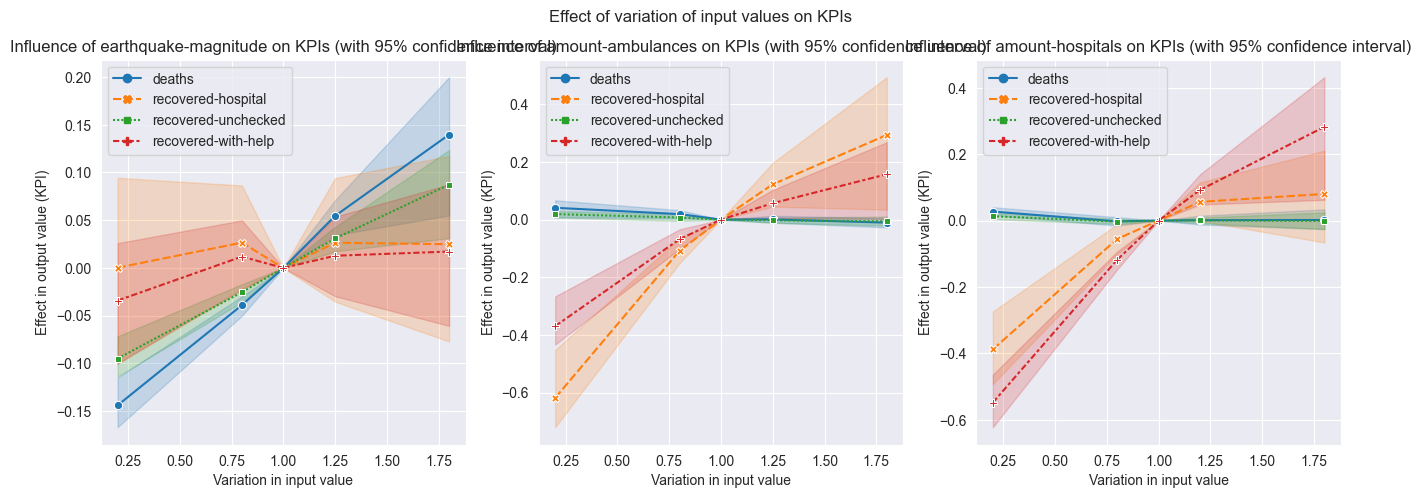

In [25]:
fig, axes = plt.subplots(1,(len(ev_inputs)))
fig.set_size_inches(16,5)
g = {}
for i, in_var in enumerate(ev_inputs):
    g[in_var] = sns.lineplot(ev_dev_df[in_var].T, ax=axes[i], markers=True, errorbar=("ci", 95), err_style="band")
    g[in_var].set_title(f"Influence of {in_var} on KPIs (with 95% confidence interval)")
    g[in_var].set_xlabel("Variation in input value")
    g[in_var].set_ylabel("Effect in output value (KPI)")
fig.suptitle("Effect of variation of input values on KPIs")
fig.savefig("../images/extreme_values_plots_ci.svg")